In [1]:
import pandas as pd
import numpy as np



In [2]:
# Load the dataset
# Display the first few rows of the dataset
df = pd.read_csv('./Latest_Data_Science_Salaries.csv')
df.head()

,Job Title,Employment Type,Experience Level,Expertise Level,Salary,Salary Currency,Company Location,Salary in USD,Employee Residence,Company Size,Year
0,Data Engineer,Full-Time,Senior,Expert,210000,United States Dollar,United States,210000,United States,Medium,2023
1,Data Engineer,Full-Time,Senior,Expert,165000,United States Dollar,United States,165000,United States,Medium,2023
2,Data Engineer,Full-Time,Senior,Expert,185900,United States Dollar,United States,185900,United States,Medium,2023
3,Data Engineer,Full-Time,Senior,Expert,129300,United States Dollar,United States,129300,United States,Medium,2023
4,Data Scientist,Full-Time,Senior,Expert,140000,United States Dollar,United States,140000,United States,Medium,2023


In [3]:
# Check for missing values in the dataset
df.isnull().sum()

Job Title             0
Employment Type       0
Experience Level      0
Expertise Level       0
Salary                0
Salary Currency       0
Company Location      0
Salary in USD         0
Employee Residence    0
Company Size          0
Year                  0
dtype: int64

In [4]:
# Summary statistics for numerical columns
numerical_summary = df.describe()

# Summary statistics for categorical columns
categorical_summary = df.describe(include=['O'])

numerical_summary, categorical_summary

(             Salary  Salary in USD         Year
 count  3.300000e+03    3300.000000  3300.000000
 mean   2.046623e+05  142095.983939  2022.495455
 std    7.279383e+05   69028.235512     0.716355
 min    1.400000e+04   15000.000000  2020.000000
 25%    9.416900e+04   90000.000000  2022.000000
 50%    1.400000e+05  136000.000000  2023.000000
 75%    1.900000e+05  185000.000000  2023.000000
 max    3.040000e+07  450000.000000  2023.000000,
             Job Title Employment Type Experience Level Expertise Level  \
 count            3300            3300             3300            3300   
 unique            111               4                4               4   
 top     Data Engineer       Full-Time           Senior          Expert   
 freq              702            3261             2065            2065   
 
              Salary Currency Company Location Employee Residence Company Size  
 count                   3300             3300               3300         3300  
 unique            

Numerical Columns:
Salary: The average salary (in the original currency) is about 204,662, with a standard deviation of 727,938. The minimum and maximum salaries are 14,000 and 30,400,000, respectively. Salary in USD: The average salary (in USD) is about 142,096, with a standard deviation of 69,028. The minimum and maximum salaries in USD are 15,000 and 450,000, respectively. Year: The data spans from 2020 to 2023, with an average year of around 2022.5.

Categorical Columns:
Job Title: There are 111 unique job titles, with "Data Engineer" being the most common. Employment Type: There are 4 unique employment types, with "Full-Time" being the most common. Experience Level: There are 4 unique experience levels, with "Senior" being the most common. Expertise Level: There are 4 unique expertise levels, with "Expert" being the most common. Salary Currency: There are 22 unique salary currencies, with "United States Dollar" being the most common. Company Location: There are 71 unique company locations, with "United States" being the most common. Employee Residence: There are 83 unique employee residences, with "United States" being the most common. Company Size: There are 3 unique company sizes, with "Medium" being the most common

EDA & Visualisations
1.1 Histograms for Numberical Columsn

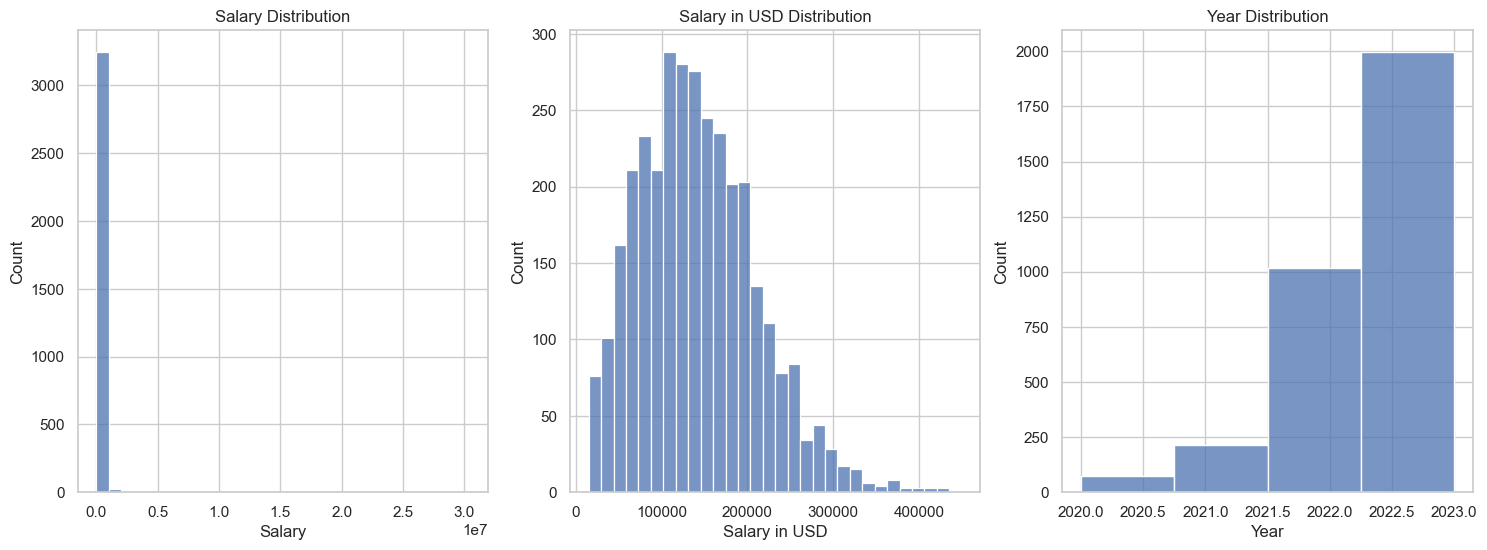

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of the plots
sns.set(style="whitegrid")

# Set up the figure and axes for a 1x3 grid of plots
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Plot histograms for the numerical variables
sns.histplot(df['Salary'], bins=30, kde=False, ax=ax[0])
sns.histplot(df['Salary in USD'], bins=30, kde=False, ax=ax[1])
sns.histplot(df['Year'], bins=4, kde=False, ax=ax[2])

# Set the titles of the plots
ax[0].set_title('Salary Distribution')
ax[1].set_title('Salary in USD Distribution')
ax[2].set_title('Year Distribution')

# Show the plots
plt.show()

1.2 Boxplots for salaries (in original currency and in USD) categorized by job title, employment type, experience level, expertise level, and company size

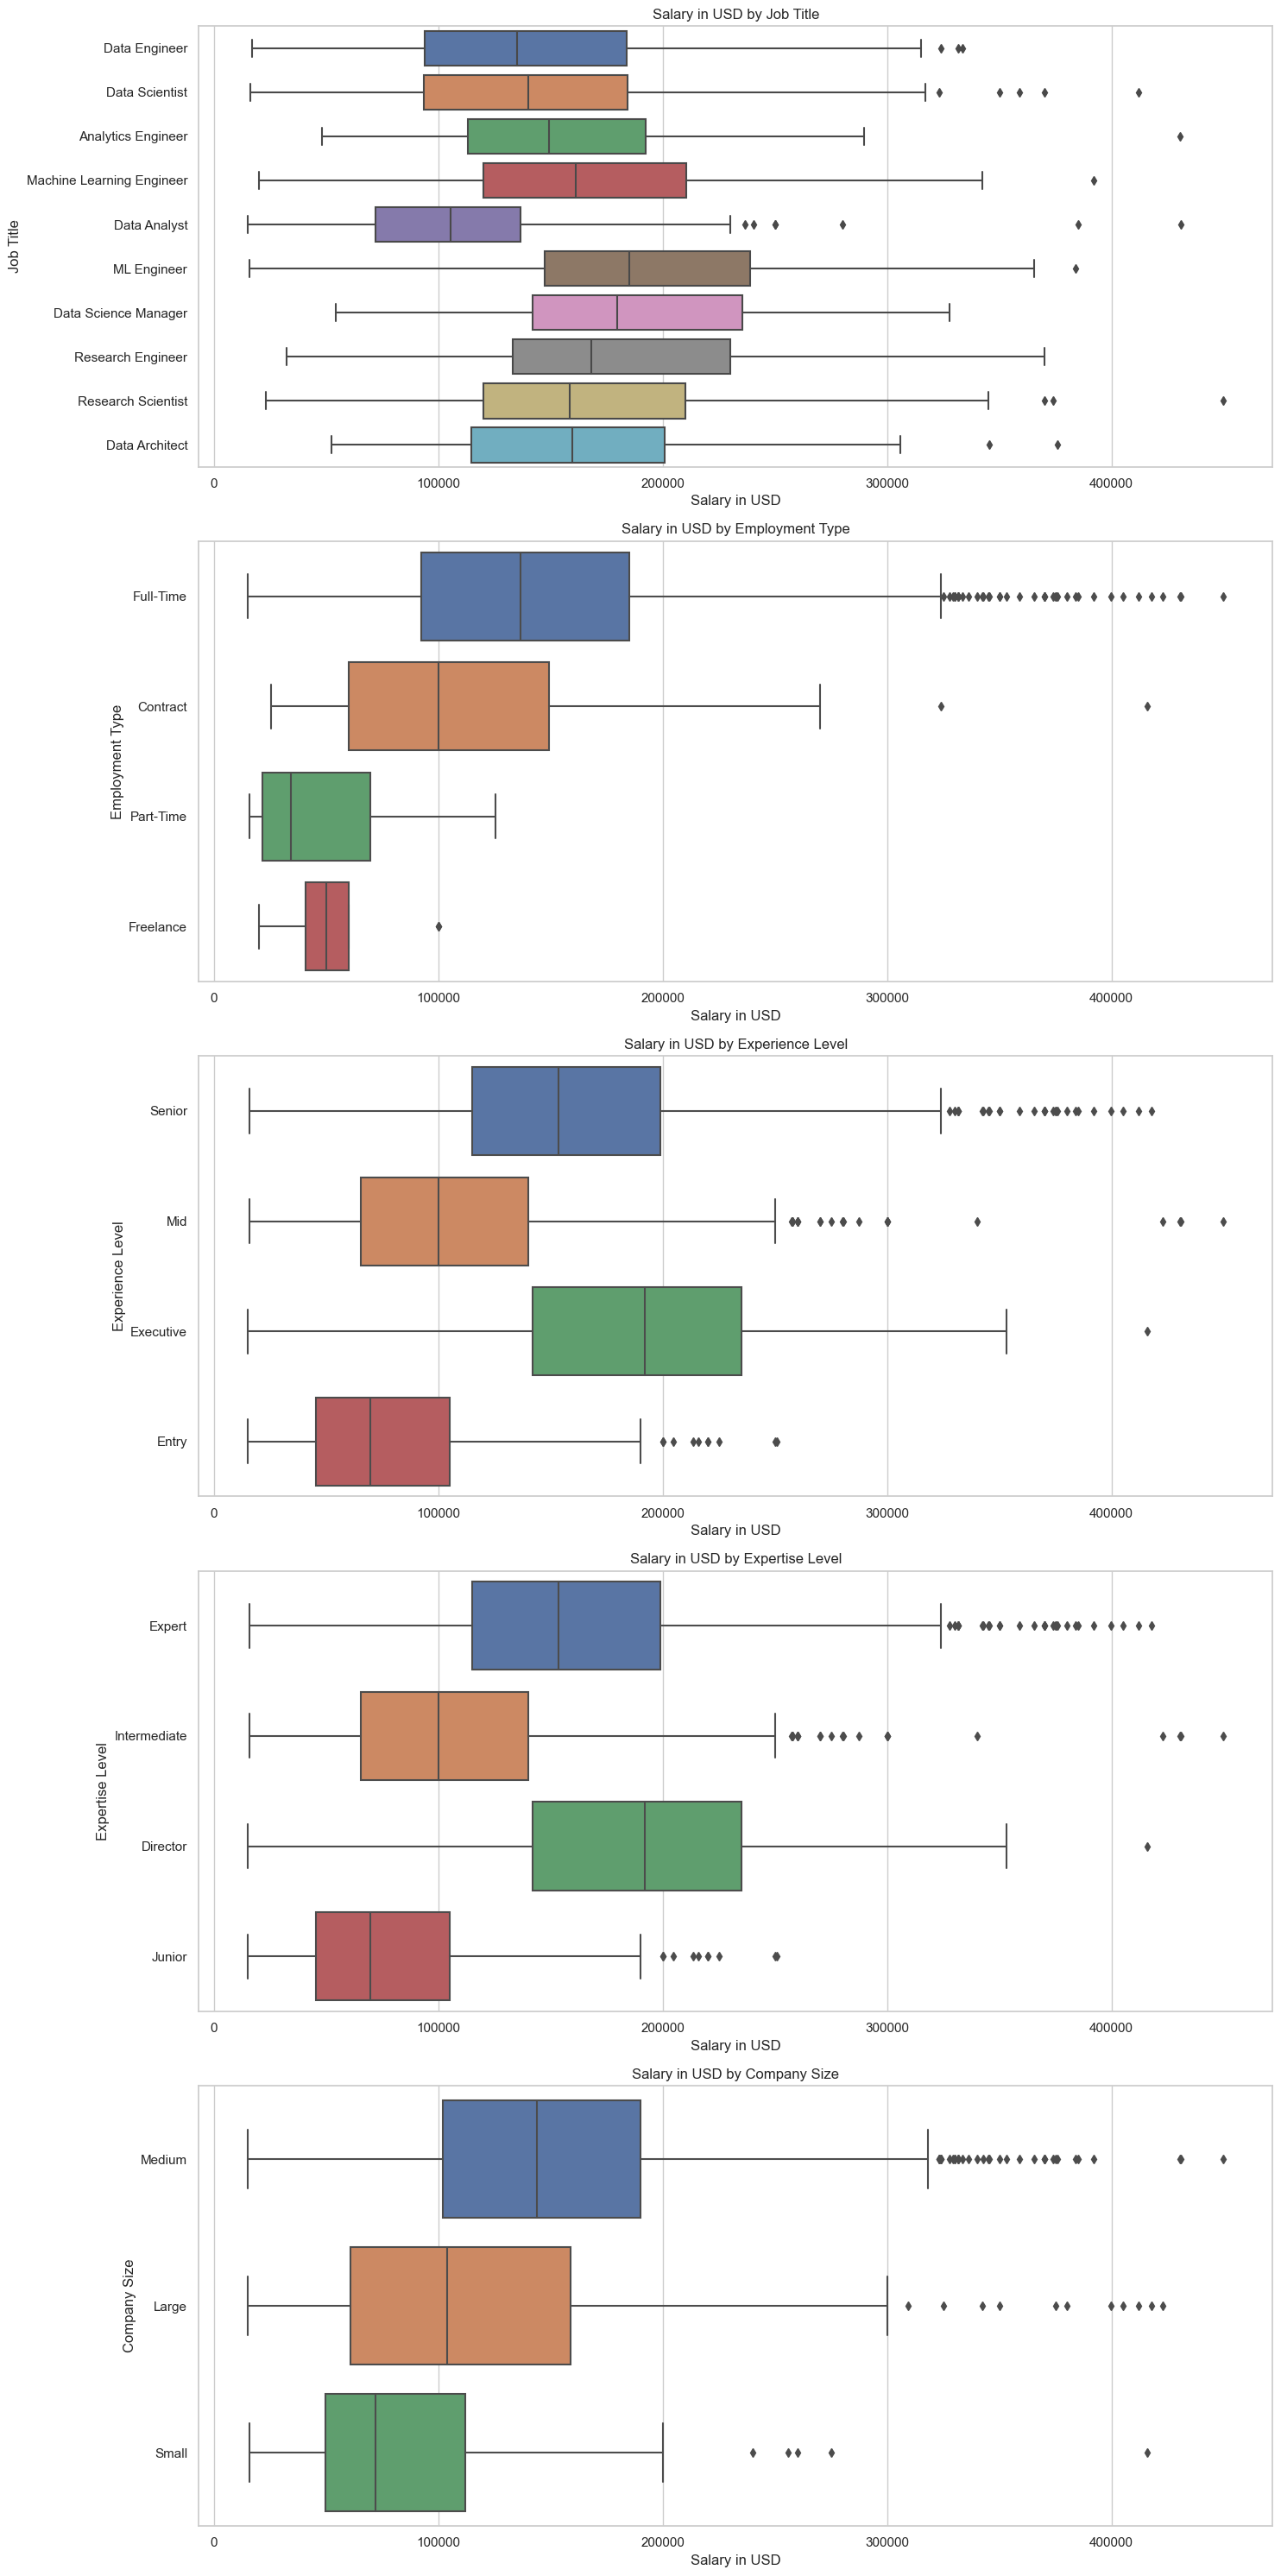

In [6]:
# Get the top 10 most frequent job titles
top_10_job_titles = df['Job Title'].value_counts().index[:10]

# Filter the data to include only the top 10 job titles
df_top_10_job_titles = df[df['Job Title'].isin(top_10_job_titles)]

# Create boxplots for Salary in USD categorized by different factors
fig, ax = plt.subplots(5, 1, figsize=(15, 30))

sns.boxplot(x='Salary in USD', y='Job Title', data=df_top_10_job_titles, ax=ax[0])
sns.boxplot(x='Salary in USD', y='Employment Type', data=df, ax=ax[1])
sns.boxplot(x='Salary in USD', y='Experience Level', data=df, ax=ax[2])
sns.boxplot(x='Salary in USD', y='Expertise Level', data=df, ax=ax[3])
sns.boxplot(x='Salary in USD', y='Company Size', data=df, ax=ax[4])

# Set the titles of the plots
ax[0].set_title('Salary in USD by Job Title')
ax[1].set_title('Salary in USD by Employment Type')
ax[2].set_title('Salary in USD by Experience Level')
ax[3].set_title('Salary in USD by Expertise Level')
ax[4].set_title('Salary in USD by Company Size')

# Show the plots
plt.tight_layout()
plt.show()

1.3 Count plots for the categorical variables¶

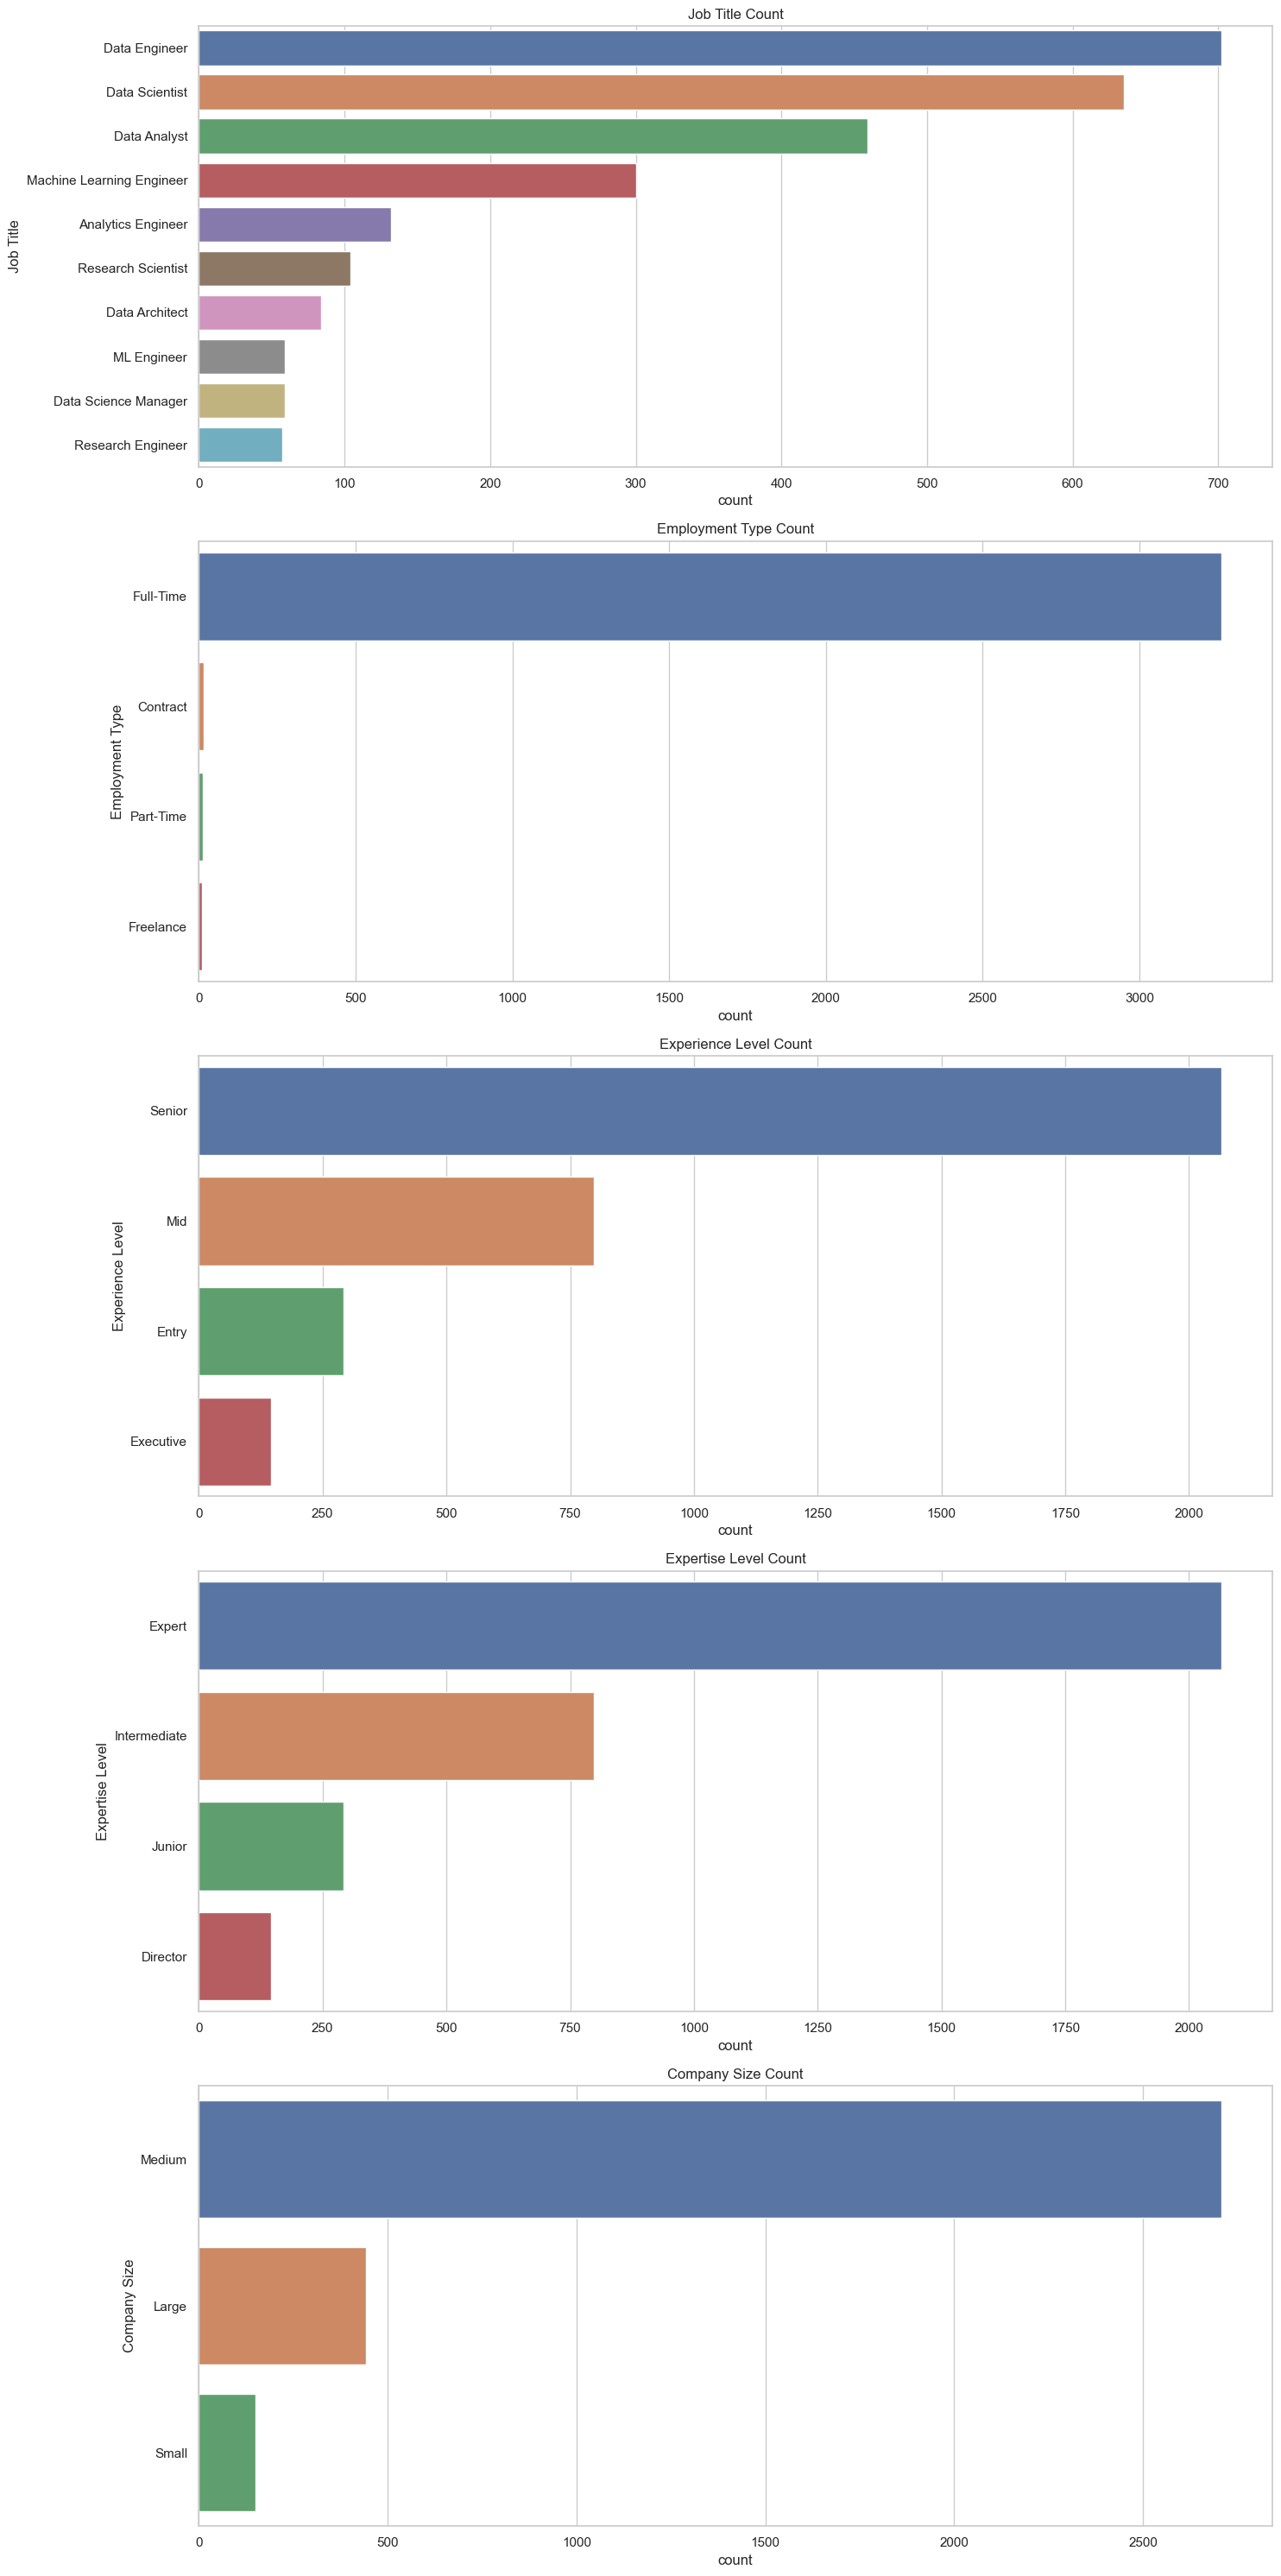

In [7]:
# Create count plots for categorical variables
fig, ax = plt.subplots(5, 1, figsize=(15, 30))

sns.countplot(y='Job Title', data=df_top_10_job_titles, order=top_10_job_titles, ax=ax[0])
sns.countplot(y='Employment Type', data=df, order=df['Employment Type'].value_counts().index, ax=ax[1])
sns.countplot(y='Experience Level', data=df, order=df['Experience Level'].value_counts().index, ax=ax[2])
sns.countplot(y='Expertise Level', data=df, order=df['Expertise Level'].value_counts().index, ax=ax[3])
sns.countplot(y='Company Size', data=df, order=df['Company Size'].value_counts().index, ax=ax[4])

# Set the titles of the plots
ax[0].set_title('Job Title Count')
ax[1].set_title('Employment Type Count')
ax[2].set_title('Experience Level Count')
ax[3].set_title('Expertise Level Count')
ax[4].set_title('Company Size Count')

# Show the plots
plt.tight_layout()
plt.show()

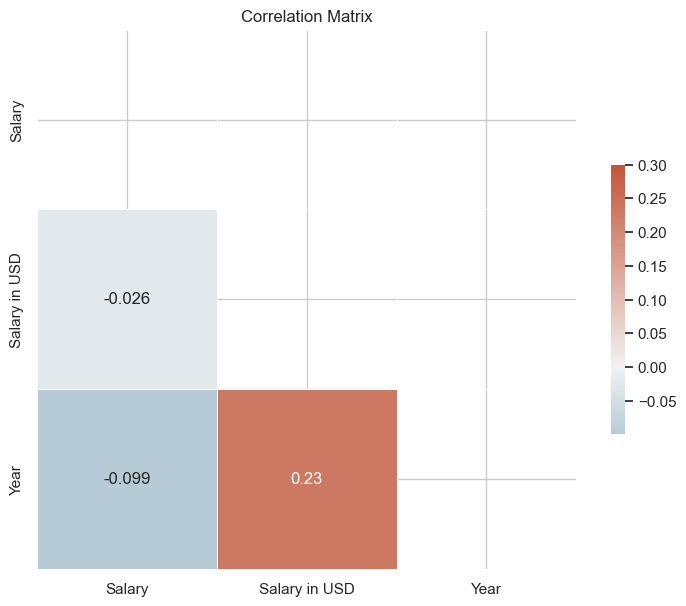

In [8]:
# Compute the correlation matrix
corr = df[['Salary', 'Salary in USD', 'Year']].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(9, 7))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

# Set the title of the plot
plt.title('Correlation Matrix')

# Show the plot
plt.show()

1.4 Mean Salaries on World Map

In [12]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Aggregate the salary information by country
country_salary = df.groupby('Company Location')['Salary in USD'].mean().reset_index()

# # Create a mapping from country names to country codes
# country_codes = {v: k for k, v in ISO3166.items()}

# # Prepare data for the world map
# country_salaries = {}
# for _, row in country_salary.iterrows():
#     country = row['Company Location']
#     salary = row['Salary in USD']
#     if country in country_codes:
#         # Convert salary to a color value
#         color_value = min(int(salary / 5000), 100)  # scale salaries for better color distribution
#         country_salaries[country_codes[country]] = color_value

C:\Users\ASUS TUF\AppData\Local\Temp\ipykernel_5300\1003895961.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


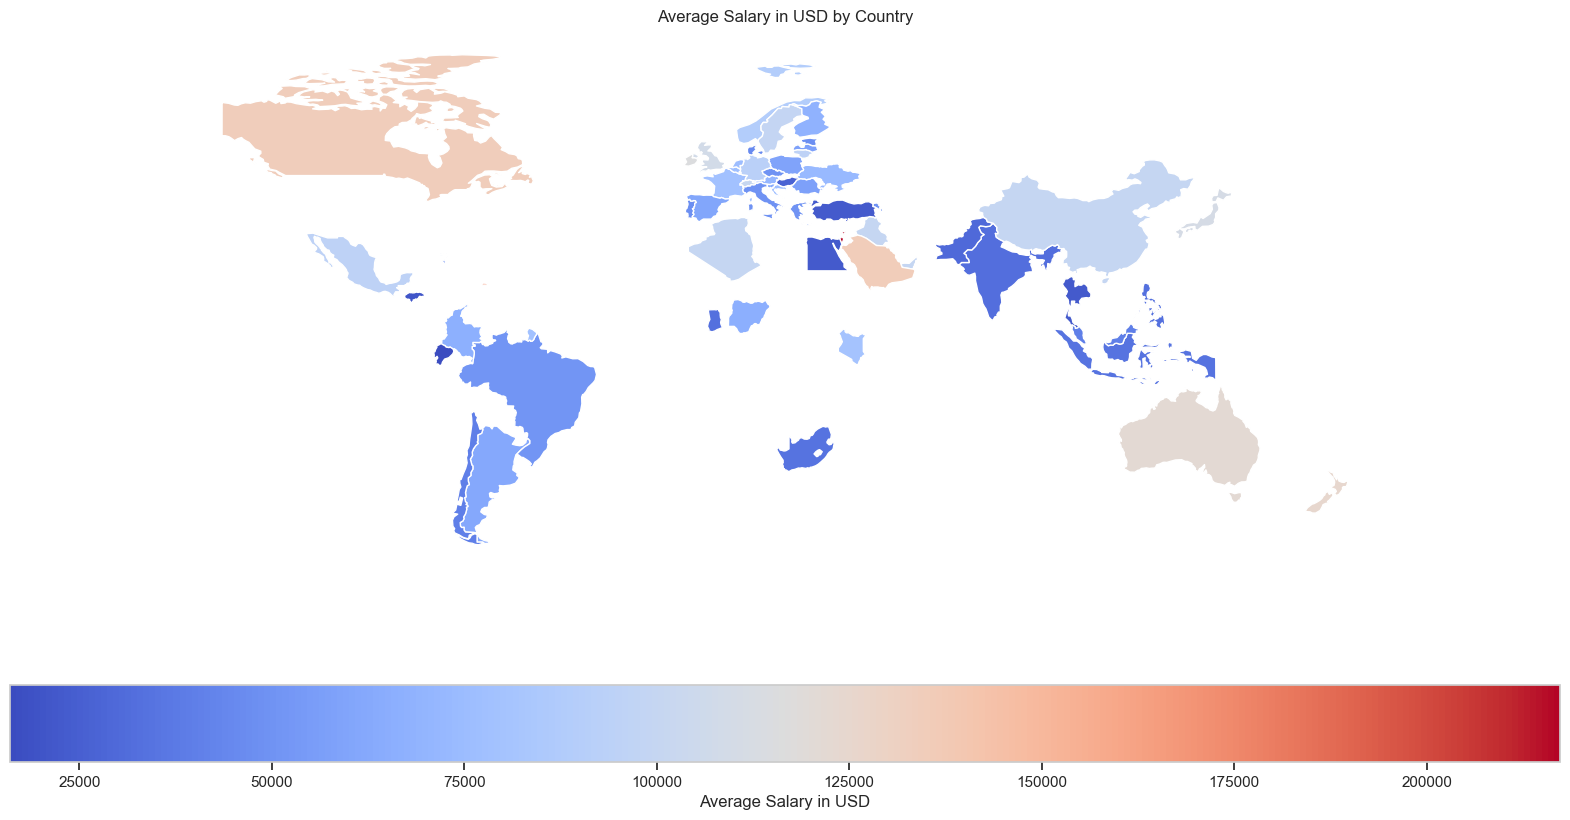

In [13]:
# Load the world map dataset
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Rename the 'name' column to match our data
world = world.rename(columns={'name': 'Company Location'})

# Merge our data with the world map data
merged = world.set_index('Company Location').join(country_salary.set_index('Company Location'))

# Create a figure and axes
fig, ax = plt.subplots(1, 1, figsize=(20, 10))

# Create the world map plot
merged.plot(column='Salary in USD', ax=ax, legend=True, cmap='coolwarm', legend_kwds={'label': "Average Salary in USD", 'orientation': "horizontal"})

# Set the title of the plot
plt.title('Average Salary in USD by Country')

# Remove the axis
ax.axis('off')

# Show the plot
plt.show()

Ensemble Predictive Model

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Define the categorical columns
categorical_cols = ['Job Title', 'Employment Type', 'Experience Level', 'Expertise Level',
                    'Company Location', 'Employee Residence', 'Company Size']

# Initialize the OneHotEncoder
ohe = OneHotEncoder(drop='first')

# Initialize the ColumnTransformer
ct = ColumnTransformer(transformers=[('encoder', ohe, categorical_cols)], remainder='passthrough')

# Apply the ColumnTransformer to the dataset
X = df.drop(columns=['Salary', 'Salary Currency', 'Salary in USD'])
y = df['Salary in USD']

X_encoded = ct.fit_transform(X)

# Split the dataset into 80% training data and 20% testing data
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=1)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2640, 274), (660, 274), (2640,), (660,))

In [15]:
# One-hot encode the categorical columns
X_encoded = pd.get_dummies(X, columns=categorical_cols)

# Split the dataset into 80% training data and 20% testing data
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=1)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2640, 281), (660, 281), (2640,), (660,))

Training Regression, Decision Tree & Random Forest

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt

# Initialize the models
lr = LinearRegression()
dt = DecisionTreeRegressor(random_state=1)
rf = RandomForestRegressor(random_state=1)

# Train the models
lr.fit(X_train, y_train)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)

# Get predictions on the test set
lr_preds = lr.predict(X_test)
dt_preds = dt.predict(X_test)
rf_preds = rf.predict(X_test)

# Calculate RMSE for each model
lr_rmse = sqrt(mean_squared_error(y_test, lr_preds))
dt_rmse = sqrt(mean_squared_error(y_test, dt_preds))
rf_rmse = sqrt(mean_squared_error(y_test, rf_preds))

lr_rmse, dt_rmse, rf_rmse

(8.379505909457858e+16, 56288.11998262462, 53958.89860476904)

Training XGBoost & SVM

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from math import sqrt

# Initialize the models
xgb_model = xgb.XGBRegressor(random_state=1)
svm_model = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))

# Train the models
xgb_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)

# Get predictions on the test set
xgb_preds = xgb_model.predict(X_test)
svm_preds = svm_model.predict(X_test)

# Calculate RMSE for each model
xgb_rmse = sqrt(mean_squared_error(y_test, xgb_preds))
svm_rmse = sqrt(mean_squared_error(y_test, svm_preds))

xgb_rmse, svm_rmse

(54234.21355667814, 69546.35375249186)

Building an Ensemble
Voting: In voting, each model in the ensemble votes for a class label, and the class label that gets the majority of votes is predicted. For regression tasks, the average prediction is taken. Mathematically, if we have (M) models and (C) classes, the predicted class (c) is given by:

[ c = \arg\max{j \in C} \sum{i=1}^{M} I(y_i = j) ]

where (I) is the indicator function, which is 1 if (y_i = j) and 0 otherwise.

Bagging: Bagging, short for Bootstrap Aggregating, involves taking multiple subsets (with replacement) of the original dataset, training a model on each subset, and combining the predictions. For classification, this is often done by majority voting, and for regression, by averaging. If we have (M) models, the predicted value (\hat{y}) is given by:

[ \hat{y} = \frac{1}{M} \sum_{i=1}^{M} y_i ]

for regression, and by voting for classification.

Boosting: Boosting involves training models sequentially, where each new model is trained to correct the mistakes made by the previous models. If we have (M) models, the final prediction (\hat{y}) is given by:

[ \hat{y} = \sum_{i=1}^{M} w_i h_i(x) ]

where (h_i(x)) is the prediction of the (i)-th model, and (w_i) is the weight of the (i)-th model, which is learned during training.

Stacking: Stacking involves training multiple models on the same dataset, and then combining their predictions using another model (the meta-model). If we have (M) models and a meta-model (f), the final prediction (\hat{y}) is given by:

[ \hat{y} = f([y_1, y_2, ..., y_M]) ]

where (y_i) is the prediction of the (i)-th model, and ([y_1, y_2, ..., y_M]) is the vector of these predictions.

In [18]:
from sklearn.ensemble import RandomForestRegressor, VotingRegressor, BaggingRegressor, AdaBoostRegressor, StackingRegressor
from sklearn.metrics import mean_squared_error

# Voting
voting_reg = VotingRegressor(estimators=[('dt', dt), ('rf', rf), ('xgb', xgb_model), ('svm', svm_model)])
voting_reg.fit(X_train, y_train)
voting_preds = voting_reg.predict(X_test)
voting_rmse = sqrt(mean_squared_error(y_test, voting_preds))

print("Voting completed. ")

# Bagging
bagging_reg = BaggingRegressor(base_estimator=dt, n_estimators=10, random_state=1)
bagging_reg.fit(X_train, y_train)
bagging_preds = bagging_reg.predict(X_test)
bagging_rmse = sqrt(mean_squared_error(y_test, bagging_preds))

print("Bagging completed.")

# Boosting
ada_reg = AdaBoostRegressor(base_estimator=dt, n_estimators=50, random_state=1)
ada_reg.fit(X_train, y_train)
ada_preds = ada_reg.predict(X_test)
ada_rmse = sqrt(mean_squared_error(y_test, ada_preds))

print("Boosting completed.")

# Stacking
stacking_reg = StackingRegressor(estimators=[('dt', dt), ('rf', rf), ('xgb', xgb_model), ('svm', svm_model)], final_estimator=lr)
stacking_reg.fit(X_train, y_train)
stacking_preds = stacking_reg.predict(X_test)
stacking_rmse = sqrt(mean_squared_error(y_test, stacking_preds))

print("Stacking completed.")

# Print the RMSE for each ensemble technique
voting_rmse, bagging_rmse, ada_rmse, stacking_rmse

Voting completed. 


E:\Python\PycharmProjects\PythonML\venv\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Bagging completed.


E:\Python\PycharmProjects\PythonML\venv\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Boosting completed.
Stacking completed.


(54067.90679797287, 54246.457688858616, 58471.23312662602, 53550.64611228418)

Stacking Output
Each of these plots provides valuable insights into the performance of the prediction model:

Scatter Plot of Actual vs. Predicted Salaries: This plot shows how well the model's predictions align with the actual salaries. If the model is perfect, all points would lie on the diagonal line. Deviations from this line indicate prediction errors. The spread of points around the line gives a sense of the model's accuracy. If points are closely packed around the line, the model has made accurate predictions. A wide dispersion of points indicates larger prediction errors.

Residual Plot: This plot shows the residuals (the differences between the actual and predicted values) on the y-axis and the actual values on the x-axis. A good model will show residuals scattered randomly around the horizontal axis. If residuals show a pattern (e.g., a curve), it means the model is not capturing some underlying trend in the data. In our case, if the residuals are randomly scattered, it suggests that the model is well-fitted. If there are patterns or trends in the residuals, it indicates that the model may be missing some information.

Histogram of Prediction Errors: This plot shows the distribution of prediction errors. Ideally, we want a normal distribution centered around zero, meaning that the model is just as likely to overestimate as underestimate the salaries, and that extreme errors are rare. A skewed or off-center distribution indicates systematic over- or under-prediction.

Prediction Error Plot: This plot is similar to the scatter plot of actual vs. predicted salaries, but with the axes swapped and a line indicating perfect predictions. Points above the line are under-predictions, and points below the line are over-predictions. This plot allows you to see at a glance where the model's predictions tend to be too high or too low, and whether the model's accuracy varies with the size of the prediction

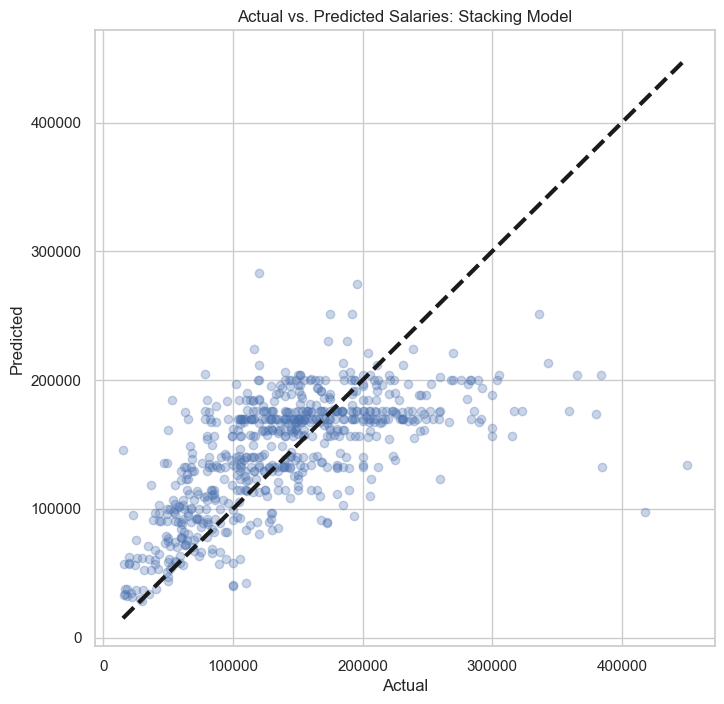

In [19]:
import matplotlib.pyplot as plt

# Scatter plot of actual vs. predicted
plt.figure(figsize=(8, 8))
plt.scatter(y_test, stacking_preds, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Salaries: Stacking Model')
plt.show()

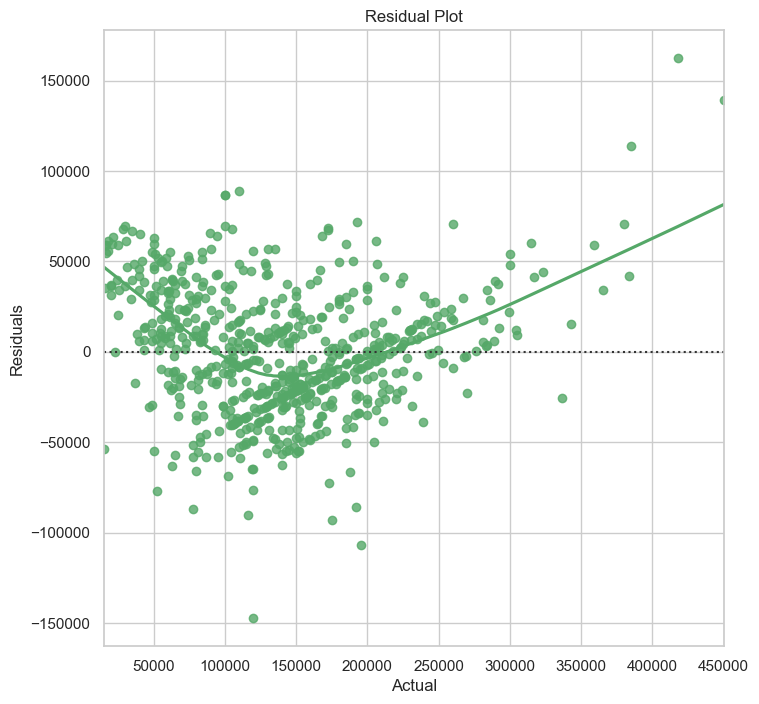

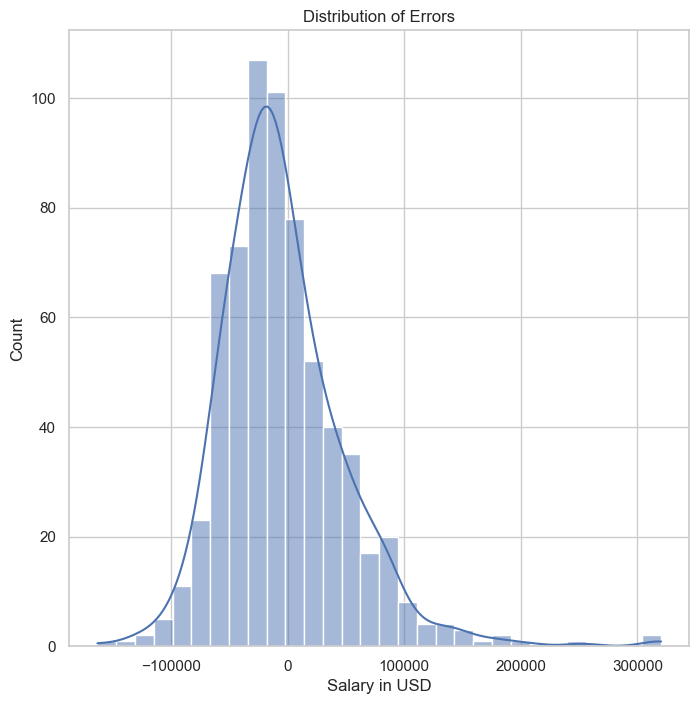

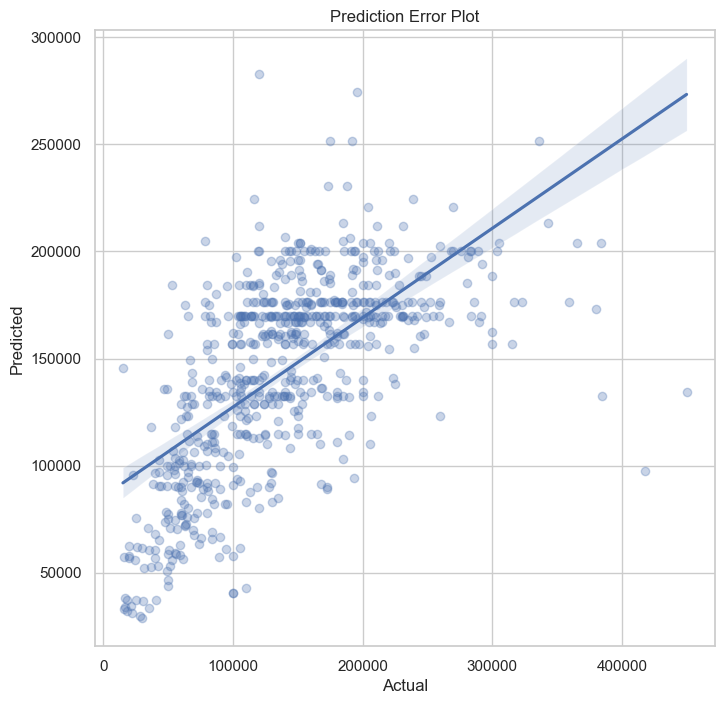

In [20]:
import seaborn as sns

# Calculate residuals
residuals = y_test - stacking_preds

# Residual plot
plt.figure(figsize=(8, 8))
sns.residplot(x=y_test, y=residuals, lowess=True, color='g')
plt.xlabel('Actual')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Distribution of Errors
plt.figure(figsize=(8, 8))
sns.histplot(residuals, bins=30, kde=True)
plt.title('Distribution of Errors')
plt.show()

# Prediction Error Plot
plt.figure(figsize=(8, 8))
sns.regplot(x=y_test, y=stacking_preds, scatter_kws={'alpha':0.3})
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Prediction Error Plot')
plt.show()

Conclusion
Ensemble of stacking Decision Tree, Random Forest, XGBoost, SVM models performed better than even the least MSE model, SVM.